In [8]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 

from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn import svm
from sklearn.preprocessing import LabelEncoder

# Importe as bibliotecas de Pipelines e Pré-processadores
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Importa o pacote OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

import sys

## 1) Lendo o dataset using pandas

In [9]:
data = pd.read_csv('/Users/andrerodrigues/Google Drive/FIAP-MBA 8IA/006 - Modelos de IA e ML/Trabalho_Final_2/Exercicio8_v2/TrabalhoEx8(1).csv',sep=';') # faz a leitura dos dados

print('\033[1;31m Vamos entender nossos dados \033[0;0m','\n', data.dtypes, '\n')
data

 Vamos entender nossos dados  
 V1     float64
V2     float64
V3     float64
V4     float64
V5     float64
V6      object
V7     float64
V8     float64
V9     float64
V10    float64
dtype: object 



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,-122.23,452600.0,129.0,41.0,880.0,D,126.0,322.0,83.252,37.88
1,-122.22,358500.0,1106.0,21.0,7099.0,D,1138.0,2401.0,83.014,37.86
2,-122.24,352100.0,190.0,52.0,1467.0,D,177.0,496.0,72.574,37.85
3,-122.25,341300.0,235.0,52.0,1274.0,D,219.0,558.0,56.431,37.85
4,-122.25,342200.0,280.0,52.0,1627.0,D,259.0,565.0,38.462,37.85
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,78100.0,374.0,25.0,1665.0,B,330.0,845.0,15.603,39.48
20636,-121.21,77100.0,150.0,18.0,697.0,B,114.0,356.0,25.568,39.49
20637,-121.22,92300.0,485.0,17.0,2254.0,B,433.0,1007.0,1.700,39.43
20638,-121.32,84700.0,409.0,18.0,1860.0,B,349.0,741.0,18.672,39.43


## 2) Retorne as informações sobre as colunas e as principais estatísticas sobre o dataset.

In [10]:
data.describe()

,V1,V2,V3,V4,V5,V7,V8,V9,V10
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,206855.816909,537.870553,28.639486,2635.763081,499.539680,1425.476744,33.656011,35.631861
std,2.003532,115395.615874,421.385070,12.585558,2181.615252,382.329753,1132.462122,21.858967,2.135952
min,-124.350000,14999.000000,1.000000,1.000000,2.000000,1.000000,3.000000,0.499900,32.540000
25%,-121.800000,119600.000000,296.000000,18.000000,1447.750000,280.000000,787.000000,19.955750,33.930000
50%,-118.490000,179700.000000,435.000000,29.000000,2127.000000,409.000000,1166.000000,31.875000,34.260000
75%,-118.010000,264725.000000,647.000000,37.000000,3148.000000,605.000000,1725.000000,45.180500,37.710000
max,-114.310000,500001.000000,6445.000000,52.000000,39320.000000,6082.000000,35682.000000,150.001000,41.950000


## 3) Realize a limpeza do dataset:

#### a. verifique se existe valores nulos

In [11]:
print('\033[1;31m Valores Faltantes antes do tratamento dos dados: \033[0;0m', '\n',data.isna().sum(), '\n')

 Valores Faltantes antes do tratamento dos dados:  
 V1       0
V2       0
V3     207
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
dtype: int64 



#### b. verifique e remova, se existir, linhas duplicadas

In [12]:
print('\033[1;31m Valores Duplicados antes do tratamento dos dados:', '\n \033[0;0m', data[data.duplicated()], '\n')
data = data.drop_duplicates()
# data = data.drop_duplicates().reset_index()
print('\033[1;31m Valores Duplicados depois do tratamento dos dados:', '\n \033[0;0m', data[data.duplicated()], '\n')

 Valores Duplicados antes do tratamento dos dados: 
  Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10]
Index: [] 

 Valores Duplicados depois do tratamento dos dados: 
  Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10]
Index: [] 



#### c. trate os elementos faltantes (media)

In [14]:
#Fill missed numerical data with mean:
data.update(data['V3'].fillna((np.around(np.mean(data['V3']),0))))

#Reset Index
data = data.reset_index()

print('\033[1;31m Valores Faltantes depois de tratar os dados: \033[0;0m', '\n',data.isna().sum(), '\n')
data

 Valores Faltantes depois de tratar os dados:  
 index    0
V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
dtype: int64 



,index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,0,-122.23,452600.0,129.0,41.0,880.0,D,126.0,322.0,83.252,37.88
1,1,-122.22,358500.0,1106.0,21.0,7099.0,D,1138.0,2401.0,83.014,37.86
2,2,-122.24,352100.0,190.0,52.0,1467.0,D,177.0,496.0,72.574,37.85
3,3,-122.25,341300.0,235.0,52.0,1274.0,D,219.0,558.0,56.431,37.85
4,4,-122.25,342200.0,280.0,52.0,1627.0,D,259.0,565.0,38.462,37.85
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,78100.0,374.0,25.0,1665.0,B,330.0,845.0,15.603,39.48
20636,20636,-121.21,77100.0,150.0,18.0,697.0,B,114.0,356.0,25.568,39.49
20637,20637,-121.22,92300.0,485.0,17.0,2254.0,B,433.0,1007.0,1.700,39.43
20638,20638,-121.32,84700.0,409.0,18.0,1860.0,B,349.0,741.0,18.672,39.43


#### d. Eliminar a coluna index do dataset, pois não traz informação

In [15]:
data.drop(columns='index', axis=1, inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,-122.23,452600.0,129.0,41.0,880.0,D,126.0,322.0,83.252,37.88
1,-122.22,358500.0,1106.0,21.0,7099.0,D,1138.0,2401.0,83.014,37.86
2,-122.24,352100.0,190.0,52.0,1467.0,D,177.0,496.0,72.574,37.85
3,-122.25,341300.0,235.0,52.0,1274.0,D,219.0,558.0,56.431,37.85
4,-122.25,342200.0,280.0,52.0,1627.0,D,259.0,565.0,38.462,37.85


## 4) Pre-processamento de dados

In [16]:
def remove_features(lista_features):
    for i in lista_features:
        data.drop(i, axis=1, inplace=True)
    return 0

## 5) Verificando a quantidade de classes na variável V6, vamos usar a função countplot () do Seaborn.

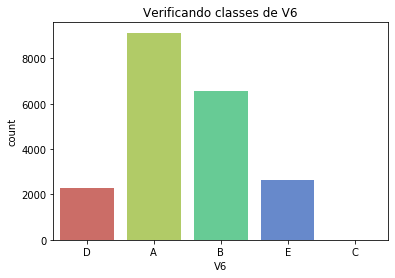

In [17]:
plot = sb.countplot(x='V6',data=data, palette='hls')
plt.title("Verificando classes de V6")
plt.show(plot)

## 6) Label Encoder

In [18]:
enc = LabelEncoder()
inteiros = enc.fit_transform(data['V6'])
inteiros

array([3, 3, 3, ..., 1, 1, 1])

#### a) Cria uma nova coluna chamada 'V6_int'

In [19]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,-122.23,452600.0,129.0,41.0,880.0,D,126.0,322.0,83.252,37.88
1,-122.22,358500.0,1106.0,21.0,7099.0,D,1138.0,2401.0,83.014,37.86
2,-122.24,352100.0,190.0,52.0,1467.0,D,177.0,496.0,72.574,37.85
3,-122.25,341300.0,235.0,52.0,1274.0,D,219.0,558.0,56.431,37.85
4,-122.25,342200.0,280.0,52.0,1627.0,D,259.0,565.0,38.462,37.85


In [20]:
data.insert(6, 'V6_int', inteiros)
data.head()

,V1,V2,V3,V4,V5,V6,V6_int,V7,V8,V9,V10
0,-122.23,452600.0,129.0,41.0,880.0,D,3,126.0,322.0,83.252,37.88
1,-122.22,358500.0,1106.0,21.0,7099.0,D,3,1138.0,2401.0,83.014,37.86
2,-122.24,352100.0,190.0,52.0,1467.0,D,3,177.0,496.0,72.574,37.85
3,-122.25,341300.0,235.0,52.0,1274.0,D,3,219.0,558.0,56.431,37.85
4,-122.25,342200.0,280.0,52.0,1627.0,D,3,259.0,565.0,38.462,37.85


#### b) Vamos verificar a relacao 1:1 entre as classes originais e aquelas produzidas por Label Encoder:

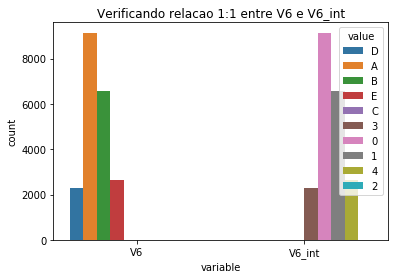

In [21]:
v6_plot = pd.DataFrame(data.iloc[:,[5,6]])
plot = sb.countplot(x="variable", hue="value", data=pd.melt(v6_plot))
plt.title("Verificando relacao 1:1 entre V6 e V6_int")
plt.show(plot)

* Nota-se que A=0, B=1, C=2, D=3 e E=4.

#### c) Agora vamos remover finalmente os dados categoricos

In [22]:
# Sixth position would be at index 6, because of zero-indexing.
data.drop(columns='V6', axis=1, inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6_int,V7,V8,V9,V10
0,-122.23,452600.0,129.0,41.0,880.0,3,126.0,322.0,83.252,37.88
1,-122.22,358500.0,1106.0,21.0,7099.0,3,1138.0,2401.0,83.014,37.86
2,-122.24,352100.0,190.0,52.0,1467.0,3,177.0,496.0,72.574,37.85
3,-122.25,341300.0,235.0,52.0,1274.0,3,219.0,558.0,56.431,37.85
4,-122.25,342200.0,280.0,52.0,1627.0,3,259.0,565.0,38.462,37.85


In [23]:
data.rename(columns={"V6_int": "V6"}, inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,-122.23,452600.0,129.0,41.0,880.0,3,126.0,322.0,83.252,37.88
1,-122.22,358500.0,1106.0,21.0,7099.0,3,1138.0,2401.0,83.014,37.86
2,-122.24,352100.0,190.0,52.0,1467.0,3,177.0,496.0,72.574,37.85
3,-122.25,341300.0,235.0,52.0,1274.0,3,219.0,558.0,56.431,37.85
4,-122.25,342200.0,280.0,52.0,1627.0,3,259.0,565.0,38.462,37.85


#### d) Exportando o dataset sem One Hot Encoder e sem Normalizacao

In [24]:
data.to_csv(r"/Users/andrerodrigues/Google Drive/FIAP-MBA 8IA/006 - Modelos de IA e ML/Trabalho_Final_2/Exercicio8_v2/data_nostd_v2.csv")

## 7) One Hot Encoder

#### a) Instancia um objeto do tipo One Hot Encoder

In [25]:
ohe = OneHotEncoder()

#### b) Transforma em arrayn numpy o dataset.

In [26]:
dataset_array = data.values

#### c) Pega o numero de linhas.

In [27]:
num_rows = dataset_array.shape[0]

#### d) Transforma a matriz em uma dimensão

In [28]:
inteiros = inteiros.reshape(len(inteiros),1)

#### e) Criar as novas features a partir da matriz de presença

In [29]:
novas_features = ohe.fit_transform(inteiros)

/Users/andrerodrigues/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


#### f) Imprime as novas features

In [30]:
novas_features

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

#### g) Concatena as novas features ao array

In [31]:
aux = novas_features.toarray()
dataset_array = np.concatenate([dataset_array, novas_features.toarray()], axis=1)

#### h) Visualizando a quantidade de linhas e colunas da base

In [32]:
dataset_array.shape

(20640, 15)

#### i) Transforma em dataframe e visualiza as colunas

In [33]:
data_ohe = pd.DataFrame(dataset_array)
data_ohe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-122.23,452600.0,129.0,41.0,880.0,3.0,126.0,322.0,83.252,37.88,0.0,0.0,0.0,1.0,0.0
1,-122.22,358500.0,1106.0,21.0,7099.0,3.0,1138.0,2401.0,83.014,37.86,0.0,0.0,0.0,1.0,0.0
2,-122.24,352100.0,190.0,52.0,1467.0,3.0,177.0,496.0,72.574,37.85,0.0,0.0,0.0,1.0,0.0
3,-122.25,341300.0,235.0,52.0,1274.0,3.0,219.0,558.0,56.431,37.85,0.0,0.0,0.0,1.0,0.0
4,-122.25,342200.0,280.0,52.0,1627.0,3.0,259.0,565.0,38.462,37.85,0.0,0.0,0.0,1.0,0.0


#### j)Vamos eliminar a coluna do Label Encoding (V6)

In [36]:
data_ohe.drop(columns=5, axis=1, inplace=True)
data_ohe.head()

,0,1,2,3,4,6,7,8,9,10,11,12,13,14
0,-122.23,452600.0,129.0,41.0,880.0,126.0,322.0,83.252,37.88,0.0,0.0,0.0,1.0,0.0
1,-122.22,358500.0,1106.0,21.0,7099.0,1138.0,2401.0,83.014,37.86,0.0,0.0,0.0,1.0,0.0
2,-122.24,352100.0,190.0,52.0,1467.0,177.0,496.0,72.574,37.85,0.0,0.0,0.0,1.0,0.0
3,-122.25,341300.0,235.0,52.0,1274.0,219.0,558.0,56.431,37.85,0.0,0.0,0.0,1.0,0.0
4,-122.25,342200.0,280.0,52.0,1627.0,259.0,565.0,38.462,37.85,0.0,0.0,0.0,1.0,0.0


#### j) Exportando o dataset com One Hot Encoder e sem Normalizacao

In [37]:
data_ohe.to_csv(r"/Users/andrerodrigues/Google Drive/FIAP-MBA 8IA/006 - Modelos de IA e ML/Trabalho_Final_2/Exercicio8_v2/data_ohe_nostd_v2.csv")